In [1]:
import numpy as np , pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
cupid = pd.read_csv("okcupid.csv")
prof_pref = pd.read_csv("preprocessing/profile_preference.csv")

In [3]:
df = cupid.__deepcopy__()

In [4]:
df = df[df.columns[:-10]]
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,-1,entertainment / media,2012-06-29-11-01,"san francisco, california",doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently)
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,100000,construction / craftsmanship,2012-06-27-23-37,"south san francisco, california",doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently)
59944,27,single,m,straight,athletic,mostly anything,socially,often,working on college/university,"asian, black",...,-1,medicine / health,2012-06-23-13-01,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ..."


In [5]:
education_mapping = {
    'working on college/university': 'college/university',
    'working on space camp': 'space camp',
    'graduated from masters program': 'masters program',
    'graduated from college/university': 'college/university',
    'working on two-year college': 'two-year college',
    'graduated from high school': 'high school',
    'working on masters program': 'masters program',
    'graduated from space camp': 'space camp',
    'college/university': 'college/university',
    'dropped out of space camp': 'space camp',
    'graduated from ph.d program': 'ph.d program',
    'graduated from law school': 'law school',
    'working on ph.d program': 'ph.d program',
    'two-year college': 'two-year college',
    'graduated from two-year college': 'two-year college',
    'working on med school': 'med school',
    'dropped out of college/university': 'college/university',
    'space camp': 'space camp',
    'graduated from med school': 'med school',
    'dropped out of high school': 'high school',
    'working on high school': 'high school',
    'masters program': 'masters program',
    'dropped out of ph.d program': 'ph.d program',
    'dropped out of two-year college': 'two-year college',
    'dropped out of med school': 'med school',
    'high school': 'high school',
    'working on law school': 'law school',
    'law school': 'law school',
    'dropped out of masters program': 'masters program',
    'ph.d program': 'ph.d program',
    'dropped out of law school': 'law school',
    'med school': 'med school'
}

# Map the education values to broader categories
df['education'] = df['education'].map(education_mapping)


In [6]:
df["education"].value_counts()

education
college/university    31467
masters program       10920
two-year college       3018
ph.d program           2408
high school            1713
space camp             1683
law school             1428
med school              681
Name: count, dtype: int64

In [7]:
# body type
df["body_type"].value_counts()

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a mapping dictionary for body types
body_type_mapping = {
    'a little extra': 'curvy',
    'average': 'average',
    'thin': 'thin',
    'athletic': 'athletic',
    'fit': 'athletic',
    'skinny': 'thin',
    'curvy': 'curvy',
    'full figured': 'curvy',
    'jacked': 'athletic',
    'rather not say': 'unknown',
    'used up': 'unknown',
    'overweight': 'curvy',
    # Fill NaN values with 'unknown'
    pd.NA: 'unknown'
}

# Map the body types to broader categories
df['body_type'] = df['body_type'].map(body_type_mapping)


In [9]:
df["body_type"]

0           curvy
1         average
2            thin
3            thin
4        athletic
           ...   
59941         NaN
59942    athletic
59943     average
59944    athletic
59945     average
Name: body_type, Length: 59946, dtype: object

In [10]:
def income_mapping(val):
    if val == -1 :
        return "unspecified"
    elif val < 25_000:
        return "below_25"
    elif val > 85_000:
        return "above_85"
    else :
        return "avg"
    
df["income"] = df["income"].map(income_mapping)

In [11]:
df["income"].value_counts()

income
unspecified    48442
avg             5582
above_85        2970
below_25        2952
Name: count, dtype: int64

In [12]:
cupid

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies

In [13]:
diet_mapping = {
    'strictly anything': 'anything',
    'mostly other': 'other',
    'anything': 'anything',
    'vegetarian': 'vegetarian',
    'mostly anything': 'anything',
    'mostly vegetarian': 'vegetarian',
    'strictly vegan': 'vegan',
    'strictly vegetarian': 'vegetarian',
    'mostly vegan': 'vegan',
    'strictly other': 'other',
    'mostly halal': 'halal',
    'other': 'other',
    'vegan': 'vegan',
    'mostly kosher': 'kosher',
    'strictly halal': 'halal',
    'halal': 'halal',
    'strictly kosher': 'kosher',
    'kosher': 'kosher',
    # Fill NaN values with 'unknown'
    pd.NA: 'unknown'
}

df['diet'] = df['diet'].map(diet_mapping)

In [14]:
df["diet"].value_counts()

diet
anything      27881
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: count, dtype: int64

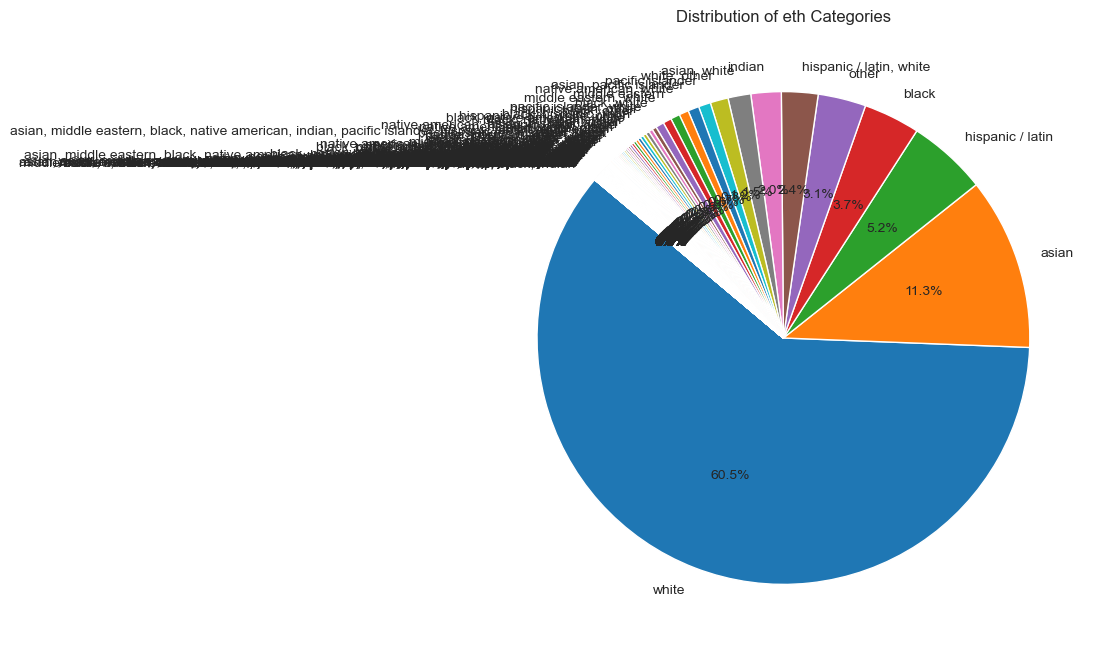

In [15]:
eth_counts = df['ethnicity'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(eth_counts, labels=eth_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of eth Categories')
plt.show()


In [16]:
df["ethnicity"].value_counts()

ethnicity
white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 217, dtype: int64

In [17]:
def eth_mapping(eth):
    
    if len(str(eth).split(",")) > 1:
        return "mixed"
    else:
        return eth
    
df["eth_map"] = df["ethnicity"].map(eth_mapping)
df["eth_map"].value_counts()

eth_map
white               32831
mixed                6859
asian                6134
hispanic / latin     2823
black                2008
other                1706
indian               1077
pacific islander      432
middle eastern        329
native american        67
Name: count, dtype: int64

In [18]:
df["job"].value_counts()

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

In [19]:
category_map = {
    'science / tech / engineering': 'Tech & Engineering',
    'computer / hardware / software': 'Tech & Engineering',
    'artistic / musical / writer': 'Creative & Media',
    'entertainment / media': 'Creative & Media',
    'sales / marketing / biz dev': 'Business & Finance',
    'executive / management': 'Business & Finance',
    'banking / financial / real estate': 'Business & Finance',
    'medicine / health': 'Health & Medicine',
    'education / academia': 'Education & Academia',
    'law / legal services': 'Legal & Government',
    'political / government': 'Legal & Government',
    'hospitality / travel': 'Service & Hospitality',
    'clerical / administrative': 'Service & Hospitality',
    'construction / craftsmanship': 'Construction & Craftsmanship',
    'transportation': 'Transportation & Military',
    'military': 'Transportation & Military',
    'student': 'Student',  # Keeping 'student' as a separate category
    'other': 'Other & Unspecified',
    'rather not say': 'Other & Unspecified',
    'unemployed': 'Other & Unspecified',
    'retired': 'Other & Unspecified'
}
df['job'] = df['job'].map(category_map)


In [20]:
df["job"].value_counts()

job
Tech & Engineering              9557
Business & Finance              9030
Other & Unspecified             8548
Creative & Media                6689
Student                         4882
Health & Medicine               3680
Education & Academia            3513
Service & Hospitality           2169
Legal & Government              2089
Construction & Craftsmanship    1021
Transportation & Military        570
Name: count, dtype: int64

In [21]:
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,eth_map
0,22,single,m,straight,curvy,anything,socially,never,college/university,"asian, white",...,Transportation & Military,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,mixed
1,35,single,m,straight,average,other,often,sometimes,space camp,white,...,Service & Hospitality,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",white
2,38,available,m,straight,thin,anything,socially,NaN,masters program,NaN,...,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",NaN
3,23,single,m,straight,thin,vegetarian,socially,NaN,college/university,white,...,Student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",white
4,29,single,m,straight,athletic,NaN,socially,never,college/university,"asian, black, other",...,Creative & Media,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,college/university,NaN,...,Business & Finance,2012-06-12-21-47,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,NaN
59942,24,single,m,straight,athletic,anything,often,sometimes,college/university,"white, other",...,Creative & Media,2012-06-29-11-01,"san francisco, california",doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),mixed
59943,42,single,m,straight,average,anything,not at all,never,masters program,asian,...,Construction & Craftsmanship,2012-06-27-23-37,"south san francisco, california",doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),asian
59944,27,single,m,straight,athletic,anything,socially,often,college/university,"asian, black",...,Health & Medicine,2012-06-23-13-01,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",mixed


<Axes: >

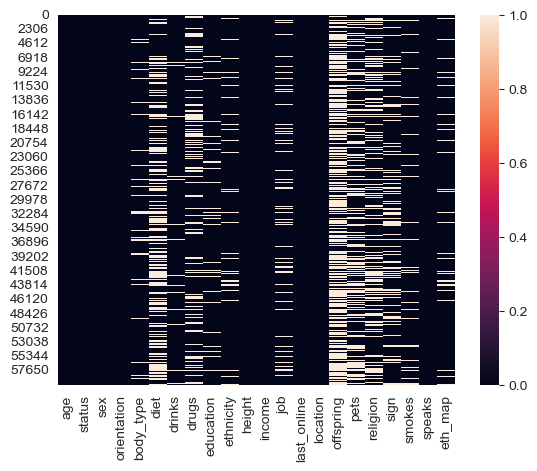

In [22]:
import seaborn as sns
sns.heatmap(df.isnull())

In [23]:
df["offspring"].value_counts()

offspring
doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: count, dtype: int64

In [25]:
# Mapping
category_map = {
    "doesn't have kids": 'Does Not Have a Kid',
    "doesn't have kids, but might want them": 'Does Not Have a Kid, Does Not Want Any More Kids',
    "doesn't have kids, but wants them": 'Does Not Have a Kid, Want Kids',
    "doesn't want kids": 'Does Not Have a Kid, Does Not Want Any More Kids',
    "has kids": 'Has Kids',
    "has a kid": 'Has Kids',
    "doesn't have kids, and doesn't want any": 'Does Not Have a Kid, Does Not Want Any More Kids',
    "has kids, but doesn't want more": 'Has Kids, Does Not Want More Kids',
    "has a kid, but doesn't want more": 'Has Kids, Does Not Want More Kids',
    "has a kid, and might want more": 'Has Kids, Wants Kids',
    "wants kids": 'Does Not Have a Kid, Want Kids',
    "might want kids": 'Does Not Have a Kid, Want Kids',
    "has kids, and might want more": 'Has Kids, Wants Kids',
    "has a kid, and wants more": 'Has Kids, Wants Kids',
    "has kids, and wants more": 'Has Kids, Wants Kids'
}

# Apply mapping
df['offspring_cat'] = df['offspring'].map(category_map)

In [26]:
df["offspring_cat"].value_counts()

offspring_cat
Does Not Have a Kid, Does Not Want Any More Kids    7934
Does Not Have a Kid                                 7560
Does Not Have a Kid, Want Kids                      3972
Has Kids                                            3764
Has Kids, Does Not Want More Kids                    717
Has Kids, Wants Kids                                 438
Name: count, dtype: int64

In [27]:
df["education"].value_counts()

education
college/university    31467
masters program       10920
two-year college       3018
ph.d program           2408
high school            1713
space camp             1683
law school             1428
med school              681
Name: count, dtype: int64

In [29]:
df["education"].value_counts()

education
college/university    31467
masters program       10920
two-year college       3018
ph.d program           2408
high school            1713
space camp             1683
law school             1428
med school              681
Name: count, dtype: int64

In [31]:
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,location,offspring,pets,religion,sign,smokes,speaks,eth_map,broad_category,offspring_cat
0,22,single,m,straight,curvy,anything,socially,never,college/university,"asian, white",...,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,mixed,NaN,"Does Not Have a Kid, Does Not Want Any More Kids"
1,35,single,m,straight,average,other,often,sometimes,space camp,white,...,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids"
2,38,available,m,straight,thin,anything,socially,NaN,masters program,NaN,...,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",NaN,NaN,NaN
3,23,single,m,straight,thin,vegetarian,socially,NaN,college/university,white,...,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids"
4,29,single,m,straight,athletic,NaN,socially,never,college/university,"asian, black, other",...,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,mixed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,college/university,NaN,...,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,NaN,NaN,Has Kids
59942,24,single,m,straight,athletic,anything,often,sometimes,college/university,"white, other",...,"san francisco, california",doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),mixed,NaN,Does Not Have a Kid
59943,42,single,m,straight,average,anything,not at all,never,masters program,asian,...,"south san francisco, california",doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),asian,NaN,Does Not Have a Kid
59944,27,single,m,straight,athletic,anything,socially,often,college/university,"asian, black",...,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",mixed,NaN,"Does Not Have a Kid, Want Kids"


In [32]:
df["drinks"].value_counts()

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64

In [34]:
df.drop(columns=["last_online","location"],inplace=True)

In [35]:
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,job,offspring,pets,religion,sign,smokes,speaks,eth_map,broad_category,offspring_cat
0,22,single,m,straight,curvy,anything,socially,never,college/university,"asian, white",...,Transportation & Military,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,mixed,NaN,"Does Not Have a Kid, Does Not Want Any More Kids"
1,35,single,m,straight,average,other,often,sometimes,space camp,white,...,Service & Hospitality,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids"
2,38,available,m,straight,thin,anything,socially,NaN,masters program,NaN,...,NaN,NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",NaN,NaN,NaN
3,23,single,m,straight,thin,vegetarian,socially,NaN,college/university,white,...,Student,doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids"
4,29,single,m,straight,athletic,NaN,socially,never,college/university,"asian, black, other",...,Creative & Media,NaN,likes dogs and likes cats,NaN,aquarius,no,english,mixed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,college/university,NaN,...,Business & Finance,has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,NaN,NaN,Has Kids
59942,24,single,m,straight,athletic,anything,often,sometimes,college/university,"white, other",...,Creative & Media,doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),mixed,NaN,Does Not Have a Kid
59943,42,single,m,straight,average,anything,not at all,never,masters program,asian,...,Construction & Craftsmanship,doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),asian,NaN,Does Not Have a Kid
59944,27,single,m,straight,athletic,anything,socially,often,college/university,"asian, black",...,Health & Medicine,"doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",mixed,NaN,"Does Not Have a Kid, Want Kids"


/Users/adi/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='pets'>

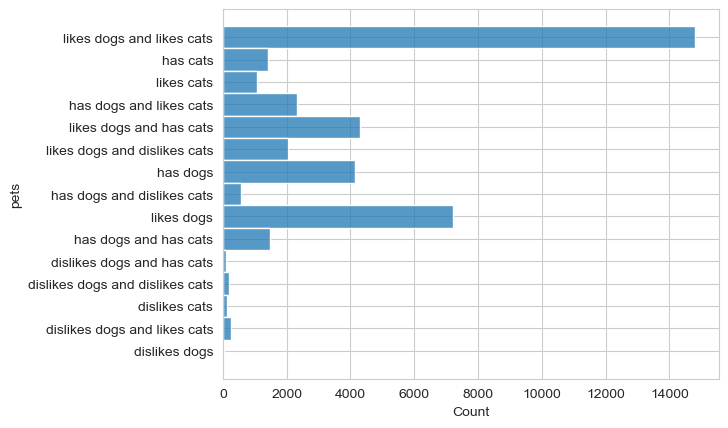

In [39]:
sns.histplot(y=df.pets)

In [44]:
# Define the mapping
category_map = {
    'likes dogs and likes cats': 'Likes Both',
    'likes dogs and has cats': 'Likes Both',
    'has dogs and likes cats': 'Likes Both',
    'has dogs and has cats': 'Likes Both',
    'likes cats': 'Likes Only Cats',
    'has cats': 'Likes Only Cats',
    'dislikes dogs and likes cats': 'Likes Only Cats',
    'dislikes dogs and has cats': 'Likes Only Cats',
    'likes dogs': 'Likes Only Dogs',
    'has dogs': 'Likes Only Dogs',
    'likes dogs and dislikes cats': 'Likes Only Dogs',
    'has dogs and dislikes cats': 'Likes Only Dogs',
    'dislikes dogs and dislikes cats': 'Dislikes Both',
    'dislikes cats': 'Dislikes Both',  # Assuming no liking for dogs
    'dislikes dogs': 'Dislikes Both',  # Assuming no liking for cats
}

# Apply the mapping
df['pets'] = df['pets'].map(category_map)

In [45]:
df["pets"].value_counts()

pets
Likes Both         22934
Likes Only Dogs    13939
Likes Only Cats     2790
Dislikes Both        362
Name: count, dtype: int64

In [46]:
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,offspring,pets,religion,sign,smokes,speaks,eth_map,broad_category,offspring_cat,pets_category
0,22,single,m,straight,curvy,anything,socially,never,college/university,"asian, white",...,"doesn't have kids, but might want them",Likes Both,agnosticism and very serious about it,gemini,sometimes,english,mixed,NaN,"Does Not Have a Kid, Does Not Want Any More Kids",Likes Both
1,35,single,m,straight,average,other,often,sometimes,space camp,white,...,"doesn't have kids, but might want them",Likes Both,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids",Likes Both
2,38,available,m,straight,thin,anything,socially,NaN,masters program,NaN,...,NaN,Likes Only Cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",NaN,NaN,NaN,Likes Only Cats
3,23,single,m,straight,thin,vegetarian,socially,NaN,college/university,white,...,doesn't want kids,Likes Only Cats,NaN,pisces,no,"english, german (poorly)",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids",Likes Only Cats
4,29,single,m,straight,athletic,NaN,socially,never,college/university,"asian, black, other",...,NaN,Likes Both,NaN,aquarius,no,english,mixed,NaN,NaN,Likes Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,college/university,NaN,...,has kids,Likes Only Dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,NaN,NaN,Has Kids,Likes Only Dogs
59942,24,single,m,straight,athletic,anything,often,sometimes,college/university,"white, other",...,doesn't have kids,Likes Both,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),mixed,NaN,Does Not Have a Kid,Likes Both
59943,42,single,m,straight,average,anything,not at all,never,masters program,asian,...,doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),asian,NaN,Does Not Have a Kid,NaN
59944,27,single,m,straight,athletic,anything,socially,often,college/university,"asian, black",...,"doesn't have kids, but wants them",Likes Both,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",mixed,NaN,"Does Not Have a Kid, Want Kids",Likes Both


In [47]:
df.drop(columns=["sign"],inplace=True)

In [48]:
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,job,offspring,pets,religion,smokes,speaks,eth_map,broad_category,offspring_cat,pets_category
0,22,single,m,straight,curvy,anything,socially,never,college/university,"asian, white",...,Transportation & Military,"doesn't have kids, but might want them",Likes Both,agnosticism and very serious about it,sometimes,english,mixed,NaN,"Does Not Have a Kid, Does Not Want Any More Kids",Likes Both
1,35,single,m,straight,average,other,often,sometimes,space camp,white,...,Service & Hospitality,"doesn't have kids, but might want them",Likes Both,agnosticism but not too serious about it,no,"english (fluently), spanish (poorly), french (...",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids",Likes Both
2,38,available,m,straight,thin,anything,socially,NaN,masters program,NaN,...,NaN,NaN,Likes Only Cats,NaN,no,"english, french, c++",NaN,NaN,NaN,Likes Only Cats
3,23,single,m,straight,thin,vegetarian,socially,NaN,college/university,white,...,Student,doesn't want kids,Likes Only Cats,NaN,no,"english, german (poorly)",white,NaN,"Does Not Have a Kid, Does Not Want Any More Kids",Likes Only Cats
4,29,single,m,straight,athletic,NaN,socially,never,college/university,"asian, black, other",...,Creative & Media,NaN,Likes Both,NaN,no,english,mixed,NaN,NaN,Likes Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,college/university,NaN,...,Business & Finance,has kids,Likes Only Dogs,catholicism but not too serious about it,no,english,NaN,NaN,Has Kids,Likes Only Dogs
59942,24,single,m,straight,athletic,anything,often,sometimes,college/university,"white, other",...,Creative & Media,doesn't have kids,Likes Both,agnosticism,no,english (fluently),mixed,NaN,Does Not Have a Kid,Likes Both
59943,42,single,m,straight,average,anything,not at all,never,masters program,asian,...,Construction & Craftsmanship,doesn't have kids,NaN,christianity but not too serious about it,no,english (fluently),asian,NaN,Does Not Have a Kid,NaN
59944,27,single,m,straight,athletic,anything,socially,often,college/university,"asian, black",...,Health & Medicine,"doesn't have kids, but wants them",Likes Both,agnosticism but not too serious about it,trying to quit,"english (fluently), spanish (poorly), chinese ...",mixed,NaN,"Does Not Have a Kid, Want Kids",Likes Both


In [51]:
df['religion'] = df.religion.str.split().str.get(0)
df["religion"].value_counts()

religion
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64

In [52]:
df["speaks"].value_counts()

speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7647, dtype: int64

In [54]:
import re

# The regex pattern
pattern = r"\s*\([^)]*\)"

# Example string
example_string = "This is a sample string (with some text in brackets)."

# Use re.sub() to replace the pattern with an empty string
cleaned_string = re.sub(pattern, "", example_string)

print(cleaned_string)


This is a sample string.


In [56]:
def clean_lang(lang):
    lang = str(lang)
    pattern = r"\s*\([^)]*\)"
    cleaned_string = re.sub(pattern, "", lang)
    return cleaned_string

df["lang_a"] = df["speaks"].apply(clean_lang)

In [63]:
def speaks_map(lang):
    if lang in [
        "english, spanish",
        "english, french",
        "english, chinese",
        "english, german",
        "english, french, spanish",
        "english, spanish, french",
        "english, japanese",
        "english, italian",
        "english, russian",
    ]:
        return lang.split(",")[1]
    elif lang == "english":
        return "english"
    else :
        return "others"

In [66]:
df["lang_b"] = df["lang_a"].apply(speaks_map)

In [67]:
df["lang_b"].value_counts()

lang_b
english      29072
others       15584
 spanish      8503
 french       2978
 chinese      1726
 german        747
 japanese      551
 italian       411
 russian       374
Name: count, dtype: int64

In [68]:
df["speaks"] = df["lang_b"]

In [70]:
df.drop(columns=["lang_b","lang_a"],inplace=True)

In [72]:
df["offspring"] = df["offspring_cat"]

In [75]:
df.drop(columns=["religion_a","offspring_cat"],inplace=True)

In [77]:
df.drop(columns=["broad_category"],inplace=True)

In [79]:
df["preference"] = prof_pref["pref"]

In [81]:
df.to_csv("cleaned_cupid.csv")

In [82]:
!ls -lh

total 557928
-rw-r--r--@ 1 adi  staff   1.0K Feb 22 18:35 LICENSE
-rw-r--r--  1 adi  staff    54B Feb 26 23:11 README.md
-rw-r--r--  1 adi  staff   424K Feb 28 12:23 basic_modelling.ipynb
-rw-r--r--  1 adi  staff    10M Feb 28 12:23 cleaned_cupid.csv
-rw-r--r--@ 1 adi  staff    80M Feb 22 18:37 cupid1.csv
-rw-r--r--@ 1 adi  staff    51M Feb 22 18:37 cupid2.csv
-rw-r--r--@ 1 adi  staff   131M Feb 22 18:57 okcupid.csv
drwxr-xr-x@ 5 adi  staff   160B Feb 27 13:08 preprocessing


In [84]:
df["ethnicity"] = df["eth_map"]
df.drop(columns=["pets_category","eth_map"],inplace=True)

In [85]:
df.to_csv("cleaned_cupid.csv")

<Axes: >

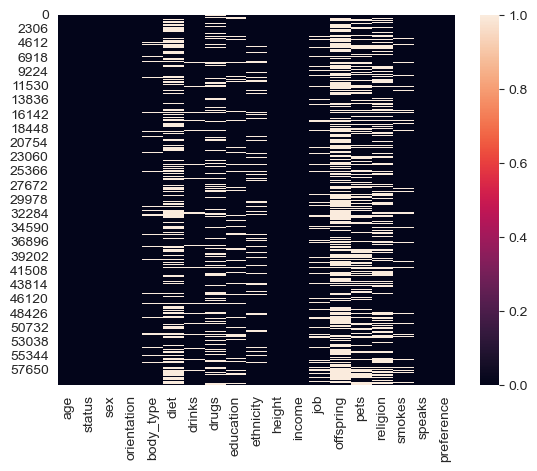

In [86]:
sns.heatmap(df.isnull())

In [87]:
df.fillna("unspecified",inplace=True)

/var/folders/f0/_f_gy0t91jqchv14f0hcl_gh0000gn/T/ipykernel_95373/3011252347.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unspecified' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("unspecified",inplace=True)


In [88]:
df.to_csv("cleaned_cupid.csv")

<Axes: >

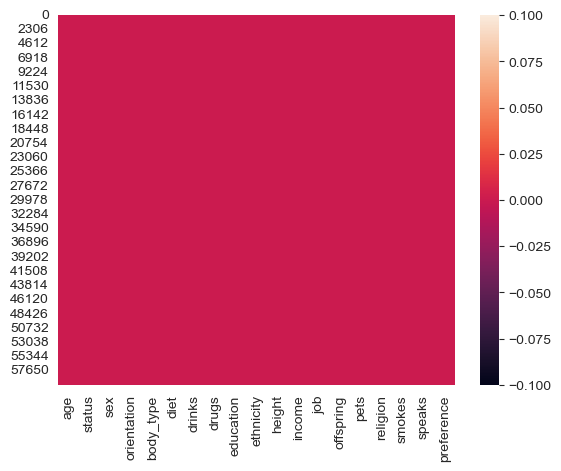

In [89]:
sns.heatmap(df.isnull())

In [90]:
df.dtypes

age             int64
status         object
sex            object
orientation    object
body_type      object
diet           object
drinks         object
drugs          object
education      object
ethnicity      object
height         object
income         object
job            object
offspring      object
pets           object
religion       object
smokes         object
speaks         object
preference     object
dtype: object

In [91]:
sns.histplot(df)

0        75.0
1        70.0
2        68.0
3        71.0
4        66.0
         ... 
59941    62.0
59942    72.0
59943    71.0
59944    73.0
59945    68.0
Name: height, Length: 59946, dtype: object